In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import requests
import time
from scipy.stats import linregress

In [2]:
data_file = "imdb-videogames.csv"

In [3]:
imdb_df = pd.read_csv(data_file)
imdb_df.head(20)

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
5,5,The Last of Us: Part II,https://www.imdb.com/title/tt6298000/?ref_=adv...,2020.0,M,8.5,"30,460","Five years after the events of The Last of Us,...",True,True,False,False,False,False,False,False,False
6,6,Horizon Forbidden West,https://www.imdb.com/title/tt12496904/?ref_=ad...,2022.0,T,9.2,"2,979",Aloy treks into an arcane region and faces new...,True,True,False,False,False,False,True,False,False
7,7,The Last of Us,https://www.imdb.com/title/tt2140553/?ref_=adv...,2013.0,M,9.7,"60,590","In a hostile, post-pandemic world, Joel and El...",True,True,False,False,False,False,False,False,False
8,8,Detroit: Become Human,https://www.imdb.com/title/tt5158314/?ref_=adv...,2018.0,M,9.2,"16,907",Take control of three androids in their quest ...,True,True,False,False,False,False,False,False,False
9,9,Death Stranding,https://www.imdb.com/title/tt5807606/?ref_=adv...,2019.0,M,8.8,"8,136",Deliveryman Sam Porter must travel across a ra...,True,True,False,False,False,False,False,False,False


In [4]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20803 non-null  int64  
 1   name         20803 non-null  object 
 2   url          20803 non-null  object 
 3   year         20536 non-null  float64
 4   certificate  7903 non-null   object 
 5   rating       11600 non-null  float64
 6   votes        11600 non-null  object 
 7   plot         20803 non-null  object 
 8   Action       20803 non-null  bool   
 9   Adventure    20803 non-null  bool   
 10  Comedy       20803 non-null  bool   
 11  Crime        20803 non-null  bool   
 12  Family       20803 non-null  bool   
 13  Fantasy      20803 non-null  bool   
 14  Mystery      20803 non-null  bool   
 15  Sci-Fi       20803 non-null  bool   
 16  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [5]:
imdb_df.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [6]:
# remove unecessary columns
imdb_df.drop(['Unnamed: 0','url','certificate'], axis=1, inplace=True)

In [7]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       20803 non-null  object 
 1   year       20536 non-null  float64
 2   rating     11600 non-null  float64
 3   votes      11600 non-null  object 
 4   plot       20803 non-null  object 
 5   Action     20803 non-null  bool   
 6   Adventure  20803 non-null  bool   
 7   Comedy     20803 non-null  bool   
 8   Crime      20803 non-null  bool   
 9   Family     20803 non-null  bool   
 10  Fantasy    20803 non-null  bool   
 11  Mystery    20803 non-null  bool   
 12  Sci-Fi     20803 non-null  bool   
 13  Thriller   20803 non-null  bool   
dtypes: bool(9), float64(2), object(3)
memory usage: 995.6+ KB


In [8]:
imdb_df.head(20)

,name,year,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,2018.0,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
5,The Last of Us: Part II,2020.0,8.5,"30,460","Five years after the events of The Last of Us,...",True,True,False,False,False,False,False,False,False
6,Horizon Forbidden West,2022.0,9.2,"2,979",Aloy treks into an arcane region and faces new...,True,True,False,False,False,False,True,False,False
7,The Last of Us,2013.0,9.7,"60,590","In a hostile, post-pandemic world, Joel and El...",True,True,False,False,False,False,False,False,False
8,Detroit: Become Human,2018.0,9.2,"16,907",Take control of three androids in their quest ...,True,True,False,False,False,False,False,False,False
9,Death Stranding,2019.0,8.8,"8,136",Deliveryman Sam Porter must travel across a ra...,True,True,False,False,False,False,False,False,False


In [9]:
#Drop rows with missing information
imdb_df = imdb_df.dropna(how='any')

In [10]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11599 non-null  object 
 1   year       11599 non-null  float64
 2   rating     11599 non-null  float64
 3   votes      11599 non-null  object 
 4   plot       11599 non-null  object 
 5   Action     11599 non-null  bool   
 6   Adventure  11599 non-null  bool   
 7   Comedy     11599 non-null  bool   
 8   Crime      11599 non-null  bool   
 9   Family     11599 non-null  bool   
 10  Fantasy    11599 non-null  bool   
 11  Mystery    11599 non-null  bool   
 12  Sci-Fi     11599 non-null  bool   
 13  Thriller   11599 non-null  bool   
dtypes: bool(9), float64(2), object(3)
memory usage: 645.6+ KB


In [11]:
# Convert votes column to int 
imdb_df['votes'] = imdb_df['votes'].str.replace(',','')
imdb_df['votes'] = imdb_df['votes'].astype('int')

In [12]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11599 non-null  object 
 1   year       11599 non-null  float64
 2   rating     11599 non-null  float64
 3   votes      11599 non-null  int64  
 4   plot       11599 non-null  object 
 5   Action     11599 non-null  bool   
 6   Adventure  11599 non-null  bool   
 7   Comedy     11599 non-null  bool   
 8   Crime      11599 non-null  bool   
 9   Family     11599 non-null  bool   
 10  Fantasy    11599 non-null  bool   
 11  Mystery    11599 non-null  bool   
 12  Sci-Fi     11599 non-null  bool   
 13  Thriller   11599 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(2)
memory usage: 645.6+ KB


In [13]:
#Convert float to int
imdb_df['year'] = imdb_df['year'].astype('int')

In [14]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11599 non-null  object 
 1   year       11599 non-null  int64  
 2   rating     11599 non-null  float64
 3   votes      11599 non-null  int64  
 4   plot       11599 non-null  object 
 5   Action     11599 non-null  bool   
 6   Adventure  11599 non-null  bool   
 7   Comedy     11599 non-null  bool   
 8   Crime      11599 non-null  bool   
 9   Family     11599 non-null  bool   
 10  Fantasy    11599 non-null  bool   
 11  Mystery    11599 non-null  bool   
 12  Sci-Fi     11599 non-null  bool   
 13  Thriller   11599 non-null  bool   
dtypes: bool(9), float64(1), int64(2), object(2)
memory usage: 645.6+ KB


In [15]:
imdb_df.head()

,name,year,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018,9.2,20759,"When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018,9.7,35703,Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013,9.5,59986,Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,2018,9.6,26118,"After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016,9.5,28722,Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [16]:
#top games by votes
top_games_votes = imdb_df.groupby('name')['votes'].sum().sort_values(ascending=False)[:20].index

In [17]:
top_games_votes

Index(['The Last of Us', 'Batman: Arkham City', 'The Last of Us: Part II',
       'Grand Theft Auto V', 'God of War', 'Spider-Man',
       'The Elder Scrolls V: Skyrim', 'Uncharted 4: A Thief's End',
       'Batman: Arkham Asylum', 'Grand Theft Auto: San Andreas',
       'Red Dead Redemption II', 'Grand Theft Auto IV', 'L.A. Noire',
       'BioShock', 'Batman: Arkham Knight', 'Grand Theft Auto: Vice City',
       'The Witcher 3: Wild Hunt', 'Detroit: Become Human',
       'Uncharted 2: Among Thieves', 'Call of Duty: Modern Warfare 2'],
      dtype='object', name='name')

In [18]:
#Top games by rating
ratings = imdb_df.loc[imdb_df['name'].isin(top_games_votes)].groupby('name')['rating'].mean().sort_values(ascending=False)

In [19]:
ratings.reset_index()

,name,rating
0,Red Dead Redemption II,9.700000
1,The Witcher 3: Wild Hunt,9.700000
2,The Last of Us,9.700000
3,Uncharted 4: A Thief's End,9.500000
4,Grand Theft Auto V,9.500000
5,Batman: Arkham City,9.400000
6,Uncharted 2: Among Thieves,9.400000
7,Grand Theft Auto: San Andreas,9.400000
8,The Elder Scrolls V: Skyrim,9.400000
9,Grand Theft Auto: Vice City,9.200000


In [20]:
#top games by votes
votes = imdb_df.loc[imdb_df['name'].isin(top_games_votes)].groupby('name')['votes'].sum().sort_values(ascending=False)

In [21]:
votes.reset_index()

,name,votes
0,The Last of Us,181778
1,Batman: Arkham City,123058
2,The Last of Us: Part II,121853
3,Grand Theft Auto V,119982
4,God of War,98688
5,Spider-Man,89066
6,The Elder Scrolls V: Skyrim,88154
7,Uncharted 4: A Thief's End,86177
8,Batman: Arkham Asylum,82759
9,Grand Theft Auto: San Andreas,79261


In [22]:
votes

name
The Last of Us                    181778
Batman: Arkham City               123058
The Last of Us: Part II           121853
Grand Theft Auto V                119982
God of War                         98688
Spider-Man                         89066
The Elder Scrolls V: Skyrim        88154
Uncharted 4: A Thief's End         86177
Batman: Arkham Asylum              82759
Grand Theft Auto: San Andreas      79261
Red Dead Redemption II             71412
Grand Theft Auto IV                69108
L.A. Noire                         61801
BioShock                           59198
Batman: Arkham Knight              56920
Grand Theft Auto: Vice City        52795
The Witcher 3: Wild Hunt           52168
Detroit: Become Human              50723
Uncharted 2: Among Thieves         50098
Call of Duty: Modern Warfare 2     46903
Name: votes, dtype: int64

In [23]:
ratings

name
Red Dead Redemption II            9.700000
The Witcher 3: Wild Hunt          9.700000
The Last of Us                    9.700000
Uncharted 4: A Thief's End        9.500000
Grand Theft Auto V                9.500000
Batman: Arkham City               9.400000
Uncharted 2: Among Thieves        9.400000
Grand Theft Auto: San Andreas     9.400000
The Elder Scrolls V: Skyrim       9.400000
Grand Theft Auto: Vice City       9.200000
Detroit: Become Human             9.200000
Batman: Arkham Asylum             9.200000
God of War                        9.100000
BioShock                          9.100000
Batman: Arkham Knight             9.000000
Grand Theft Auto IV               8.900000
Call of Duty: Modern Warfare 2    8.800000
L.A. Noire                        8.700000
The Last of Us: Part II           8.500000
Spider-Man                        8.188889
Name: rating, dtype: float64

In [24]:
games_rates = ratings.to_frame()

In [25]:
games_rates

,rating
name,
Red Dead Redemption II,9.700000
The Witcher 3: Wild Hunt,9.700000
The Last of Us,9.700000
Uncharted 4: A Thief's End,9.500000
Grand Theft Auto V,9.500000
Batman: Arkham City,9.400000
Uncharted 2: Among Thieves,9.400000
Grand Theft Auto: San Andreas,9.400000
The Elder Scrolls V: Skyrim,9.400000


In [26]:
games_votes = pd.DataFrame(votes)

In [27]:
games_votes

,votes
name,
The Last of Us,181778
Batman: Arkham City,123058
The Last of Us: Part II,121853
Grand Theft Auto V,119982
God of War,98688
Spider-Man,89066
The Elder Scrolls V: Skyrim,88154
Uncharted 4: A Thief's End,86177
Batman: Arkham Asylum,82759


In [28]:
games_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Red Dead Redemption II to Spider-Man
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  20 non-null     float64
dtypes: float64(1)
memory usage: 960.0+ bytes


FileNotFoundError: [Errno 2] No such file or directory: 'Visuals/games_by_votes.png'

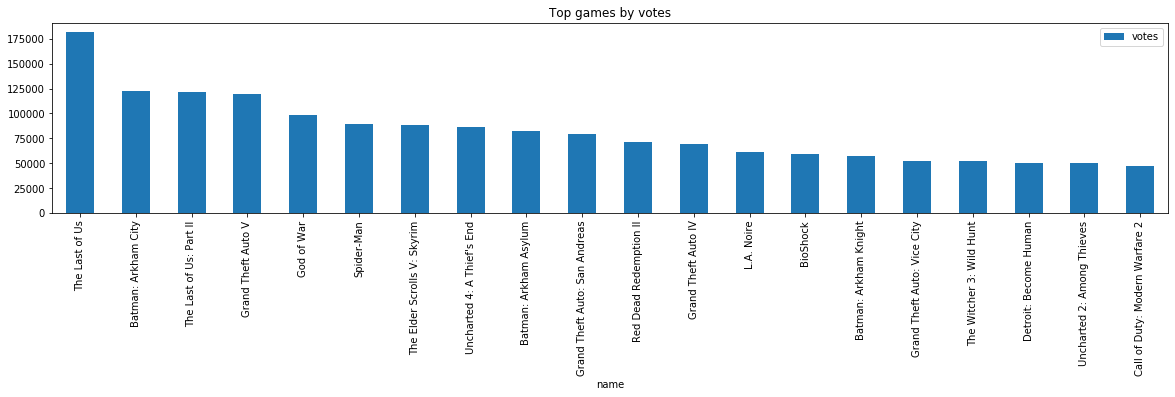

In [36]:
# Create a bar chart based upon the above data
games_votes.plot(kind="bar", figsize=(20,3.5))

# Set a title for the chart
plt.title("Top games by votes")

plt.savefig("Visuals/games_by_votes.png")

plt.show()

OSError: [Errno 30] Read-only file system: '/games_by_rating.png'

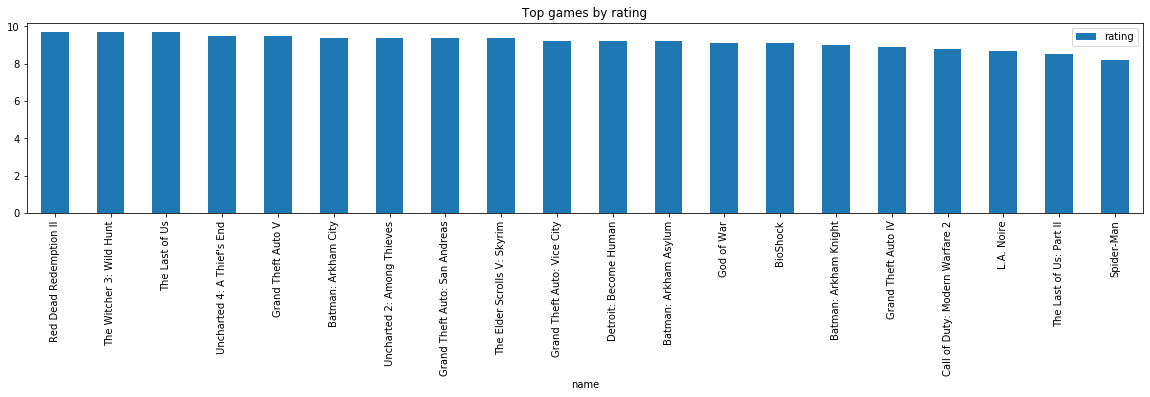

In [35]:
# Create a bar chart based upon the above data
games_rates.plot(kind="bar", figsize=(20,3.5))

# Set a title for the chart
plt.title("Top games by rating")

plt.savefig("/games_by_rating.png")

plt.show()

In [ ]:

#top 7 games by votes:
#The Last of Us                                181778
#Grand Theft Auto V                            119982
#Uncharted 4: A Thief's End                     86177
#God of War                                     78368
#Red Dead Redemption II                         71412
#The Witcher 3: Wild Hunt                       52168
#Mass Effect 2                                  39825

#The last of us is on the first place by rating and by votes. Rating and votes are matching. 
#As we can see, the game is very popular, a tv series, based on the game's plot, was launched and shown recently 
#on HBO and has IMDB rating 8.2 out of 10. 
#God of War is on the second place in ratings, but on the 4th place in votes.
# Grand theft auto V is has the second place in votes, but its not presented in rating among top 7 popular games.
#There are games that are presented in top 7 by rating but not presented in votes and vice versa. 
# there is no relationship between rating and votes except The last of us. 